In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
#csv
df1=pd.read_csv('covid_19_india.csv')
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 9
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,NaN
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4597,4598.0,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0,NaN
4598,4599.0,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0,NaN
4599,4600.0,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0,NaN
4600,4601.0,28/07/20,8:00 AM,West Bengal,-,-,39917.0,1411.0,60830.0,NaN


In [246]:
df1['Date']= pd.to_datetime(df1['Date'])

In [247]:
##Necessary steps before insight

In [248]:
#dropping irrelevant columns
df1.drop('Unnamed: 9',axis=1,inplace=True)
df1.drop(4601,axis=0,inplace=True)
df1.drop('ConfirmedIndianNational',axis=1,inplace=True)
df1.drop('ConfirmedForeignNational',axis=1,inplace=True)
df1

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,0.0,0.0,1.0
2,3.0,2020-01-02,6:00 PM,Kerala,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,0.0,0.0,3.0
4,5.0,2020-03-02,6:00 PM,Kerala,0.0,0.0,3.0
...,...,...,...,...,...,...,...
4596,4597.0,2020-07-28,8:00 AM,Telengana,42909.0,480.0,57142.0
4597,4598.0,2020-07-28,8:00 AM,Tripura,2467.0,17.0,4049.0
4598,4599.0,2020-07-28,8:00 AM,Uttarakhand,3675.0,66.0,6328.0
4599,4600.0,2020-07-28,8:00 AM,Uttar Pradesh,42833.0,1456.0,70493.0


In [249]:
#Assuming formula to find active cases on a day to be "(confirmed cases-(cured+deaths))"
active = df1["Confirmed"]-(df1['Cured']+df1["Deaths"])
df1["Active"]=active
df1

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,1.0,2020-01-30,6:00 PM,Kerala,0.0,0.0,1.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,0.0,0.0,1.0,1.0
2,3.0,2020-01-02,6:00 PM,Kerala,0.0,0.0,2.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,0.0,0.0,3.0,3.0
4,5.0,2020-03-02,6:00 PM,Kerala,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...
4596,4597.0,2020-07-28,8:00 AM,Telengana,42909.0,480.0,57142.0,13753.0
4597,4598.0,2020-07-28,8:00 AM,Tripura,2467.0,17.0,4049.0,1565.0
4598,4599.0,2020-07-28,8:00 AM,Uttarakhand,3675.0,66.0,6328.0,2587.0
4599,4600.0,2020-07-28,8:00 AM,Uttar Pradesh,42833.0,1456.0,70493.0,26204.0


In [250]:
##Insights to be taken

In [251]:
df2=df1.set_index('State/UnionTerritory')
df2

,Sno,Date,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,,,
Kerala,1.0,2020-01-30,6:00 PM,0.0,0.0,1.0,1.0
Kerala,2.0,2020-01-31,6:00 PM,0.0,0.0,1.0,1.0
Kerala,3.0,2020-01-02,6:00 PM,0.0,0.0,2.0,2.0
Kerala,4.0,2020-02-02,6:00 PM,0.0,0.0,3.0,3.0
Kerala,5.0,2020-03-02,6:00 PM,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...
Telengana,4597.0,2020-07-28,8:00 AM,42909.0,480.0,57142.0,13753.0
Tripura,4598.0,2020-07-28,8:00 AM,2467.0,17.0,4049.0,1565.0
Uttarakhand,4599.0,2020-07-28,8:00 AM,3675.0,66.0,6328.0,2587.0


In [252]:
active_cases=df2['Active']
active_cases     #active cases list with their states as their respective index

State/UnionTerritory
Kerala               1.0
Kerala               1.0
Kerala               2.0
Kerala               3.0
Kerala               3.0
                  ...   
Telengana        13753.0
Tripura           1565.0
Uttarakhand       2587.0
Uttar Pradesh    26204.0
West Bengal      19502.0
Name: Active, Length: 4601, dtype: float64

In [253]:
#to find maximum active cases ever recorded and the respective state
print(active_cases.max())
print(active_cases.idxmax())

148905.0
Maharashtra


In [254]:
#Therefore state with maximum active cases ever recorded is 'Maharashtra' with 148905

In [255]:
#to find minimum active cases ever recorded and the respective state
print(active_cases.min())
print(active_cases.idxmin())

0.0
Kerala


In [256]:
#therefore state with minimum active cases ever recorded is 'Kerala' with 0

In [257]:
death_cured_ratio=df2['Deaths']/df2['Cured']
death_cured_ratio #list of ratio of cured and deaths

State/UnionTerritory
Kerala                NaN
Kerala                NaN
Kerala                NaN
Kerala                NaN
Kerala                NaN
                   ...   
Telengana        0.011186
Tripura          0.006891
Uttarakhand      0.017959
Uttar Pradesh    0.033992
West Bengal      0.035348
Length: 4601, dtype: float64

In [258]:
print(death_cured_ratio.max())
print(death_cured_ratio.idxmax())

inf
Karnataka


In [259]:
print(death_cured_ratio.min())
print(death_cured_ratio.idxmin())

0.0
Kerala


In [260]:
delhi=df2.loc[['Delhi'],['Date','Cured','Deaths','Active']]
delhi

,Date,Cured,Deaths,Active
State/UnionTerritory,,,,
Delhi,2020-02-03,0.0,0.0,1.0
Delhi,2020-03-03,0.0,0.0,1.0
Delhi,2020-04-03,0.0,0.0,1.0
Delhi,2020-05-03,0.0,0.0,2.0
Delhi,2020-06-03,0.0,0.0,3.0
...,...,...,...,...
Delhi,2020-07-24,109065.0,3745.0,14554.0
Delhi,2020-07-25,110931.0,3777.0,13681.0
Delhi,2020-07-26,113068.0,3806.0,12657.0


In [261]:
from matplotlib import style
style.use("ggplot")

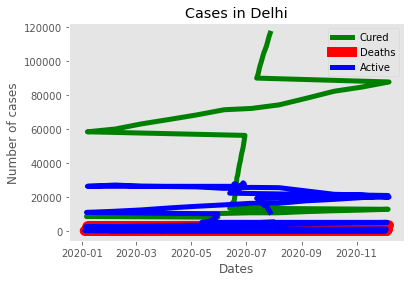

In [262]:
#Plotting Cured
plt.plot(delhi['Date'],delhi['Cured'],'g',label='Cured', linewidth=5)

#Plotting Deaths
plt.plot(delhi['Date'],delhi['Deaths'],'r',label='Deaths',linewidth=10)

#Plotting Active
plt.plot(delhi['Date'],delhi['Active'],'b',label='Active',linewidth=5)

#Giving the title for our plot
plt.title('Cases in Delhi')

#Giving the names to axes
plt.ylabel('Number of cases')
plt.xlabel('Dates')

#Giving description about the plot curves
plt.legend()

#Defining the the background of our plot
#plt.grid(True, color = 'k')
plt.grid(False)

#Showing what we have plotted
plt.show()

In [263]:
maharashtra=df2.loc[['Maharashtra'],['Date','Cured','Deaths','Active']]
maharashtra

,Date,Cured,Deaths,Active
State/UnionTerritory,,,,
Maharashtra,2020-09-03,0.0,0.0,2.0
Maharashtra,2020-10-03,0.0,0.0,5.0
Maharashtra,2020-11-03,0.0,0.0,2.0
Maharashtra,2020-12-03,0.0,0.0,11.0
Maharashtra,2020-03-13,0.0,0.0,14.0
...,...,...,...,...
Maharashtra,2020-07-24,194253.0,12854.0,140395.0
Maharashtra,2020-07-25,199967.0,13132.0,144018.0
Maharashtra,2020-07-26,207194.0,13389.0,145785.0


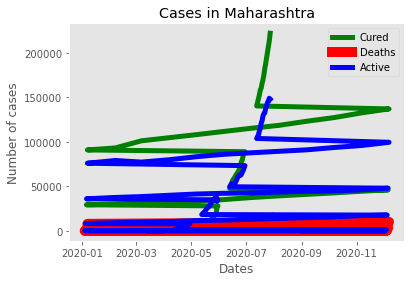

In [264]:
#Plotting Cured
plt.plot(maharashtra['Date'],maharashtra['Cured'],'g',label='Cured', linewidth=5)

#Plotting Deaths
plt.plot(maharashtra['Date'],maharashtra['Deaths'],'r',label='Deaths',linewidth=10)

#Plotting Active
plt.plot(maharashtra['Date'],maharashtra['Active'],'b',label='Active',linewidth=5)

#Giving the title for our plot
plt.title('Cases in Maharashtra')

#Giving the names to axes
plt.ylabel('Number of cases')
plt.xlabel('Dates')

#Giving description about the plot curves
plt.legend()

#Defining the the background of our plot
#plt.grid(True, color = 'k')
plt.grid(False)

#Showing what we have plotted
plt.show()

In [265]:
delhi_date_as_index=delhi.set_index('Date')
delhi_date_as_index

,Cured,Deaths,Active
Date,,,
2020-02-03,0.0,0.0,1.0
2020-03-03,0.0,0.0,1.0
2020-04-03,0.0,0.0,1.0
2020-05-03,0.0,0.0,2.0
2020-06-03,0.0,0.0,3.0
...,...,...,...
2020-07-24,109065.0,3745.0,14554.0
2020-07-25,110931.0,3777.0,13681.0
2020-07-26,113068.0,3806.0,12657.0


In [266]:
delhi_lastcase=delhi_date_as_index.iloc[148]
delhi_lastcase

Cured     116372.0
Deaths      3853.0
Active     10994.0
Name: 2020-07-28 00:00:00, dtype: float64

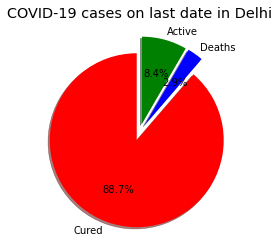

In [267]:
#Pie chart of Delhi

#Quantities for plotting
cases= ["Cured","Deaths","Active"]


#Defining colors for plot
colors = ["red","blue","green"]

# Plotting pie chart
plt.pie(delhi_lastcase, labels=cases,explode = [0.1,0.1,0.1] ,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

#Defining the title of our plot
plt.title("COVID-19 cases on last date in Delhi")

#Show what we have plotted
plt.show()

In [268]:
maharashtra_date_as_index=maharashtra.set_index('Date')
maharashtra_date_as_index

,Cured,Deaths,Active
Date,,,
2020-09-03,0.0,0.0,2.0
2020-10-03,0.0,0.0,5.0
2020-11-03,0.0,0.0,2.0
2020-12-03,0.0,0.0,11.0
2020-03-13,0.0,0.0,14.0
...,...,...,...
2020-07-24,194253.0,12854.0,140395.0
2020-07-25,199967.0,13132.0,144018.0
2020-07-26,207194.0,13389.0,145785.0


In [269]:
maharashtra_lastcase=maharashtra_date_as_index.iloc[141]
maharashtra_lastcase

Cured     221944.0
Deaths     13883.0
Active    147896.0
Name: 2020-07-28 00:00:00, dtype: float64

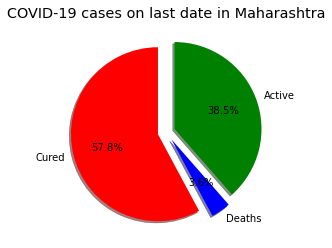

In [270]:
#Pie chart of Maharashtra

#Quantities for plotting
cases= ["Cured","Deaths","Active"]


#Defining colors for plot
colors = ["red","blue","green"]

# Plotting pie chart
plt.pie(maharashtra_lastcase, labels=cases,explode = [0.1,0.1,0.1] ,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

#Defining the title of our plot
plt.title("COVID-19 cases on last date in Maharashtra")

#Show what we have plotted
plt.show()